look at what triggers a stock to enter and leave the portfolio

In [1]:
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np 
import twoSig_comp as ts
import data_utils as du

from sklearn.linear_model import LogisticRegression

In [4]:
reload(ts)
ss = ts.TwoSig(fn='/Users/leiyao/data/kaggle_2sig/train_small.h5')
ss._add_enter_exit_time()
df = ss._df

In [25]:
ef1 = df.pivot(index='timestamp', columns='id', values='just_enter')
ef2 = df.pivot(index='timestamp', columns='id', values='exit_next')

ef = pd.concat([ef1, ef2], ignore_index=True)
ef.fillna(False, inplace=True)

In [27]:
rets = df.pivot(index='timestamp', columns='id', values='y')

In [37]:
xx = ef.corr()

In [58]:
cluster = xx.loc[xx[0].abs()>0.5, 0].index.tolist()

In [61]:
xx = rets[cluster].corr()

In [73]:
xx.loc[xx[0]>0.2, 0]

id
0       1.000000
20      0.294854
52      0.226290
380     0.213776
384     0.206394
832     0.203315
918     0.218463
1161    0.251699
1359    0.209026
1672    0.215561
1878    0.202813
Name: 0, dtype: float64

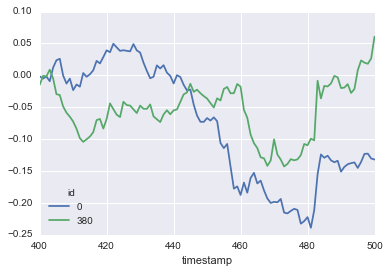

In [77]:
rets.loc[400:, [0, 380]].cumsum().plot()